<a href="https://colab.research.google.com/github/TheCrypticCanadian/Jupyter-Notebook/blob/master/Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

! ls

adult.data  adult.names  adult.test  drive  sample_data


# Setting Up Data

In [6]:
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours-per-week", "native_country", "income"]
 
train = pd.read_csv("adult.data", names=column_names)
test = pd.read_csv("adult.test",names=column_names ,skiprows=1)

train_df = pd.DataFrame(train, columns=column_names)
test_df = pd.DataFrame(test, columns=column_names)

X_train = train_df.iloc[:,:-1]
y_train = train_df["income"].astype('category')
y_train_cat = y_train.cat.codes

X_test = train_df.iloc[:,:-1]
y_test = train_df["income"]
#y_test_cat = y_test.cat.codes


# Visualization

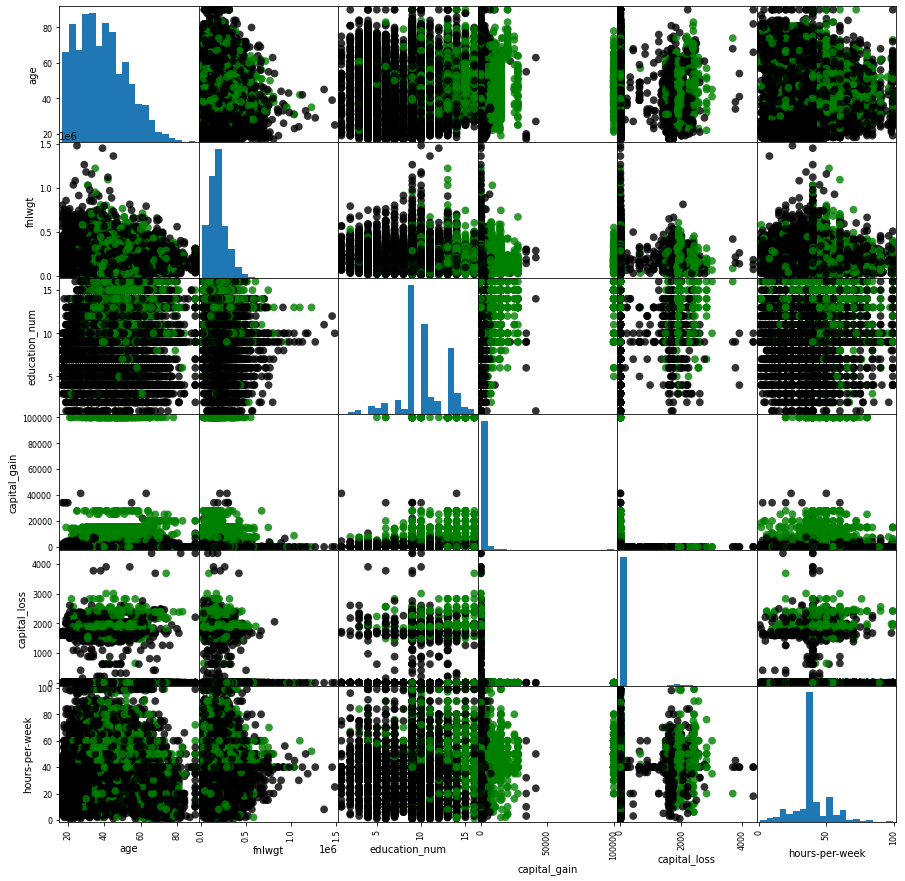

In [7]:
grr = pd.plotting.scatter_matrix(X_train, c=y_train_cat, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8,  cmap = mcolors.ListedColormap(["black", "green"]))

# Encoding

### One Hot

In [8]:
numeric_features = ['age', 'fnlwgt', 'education_num','capital_gain','capital_loss','hours-per-week']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['workclass', 'education', 'marital_status','occupation','relationship','race','sex','native_country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

test = preprocessor.fit_transform(X_train)


# Classification Algorithms


In [9]:
model = DecisionTreeClassifier(max_depth=5)
pipeline = Pipeline(steps=[('t', preprocessor), ('m',model)])
pipeline.fit(X_train,y_train)
yhat = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 85.21


In [10]:
model2 = SVC(kernel="linear",C=0.025)
pipeline2 = Pipeline(steps=[('t', preprocessor), ('m',model2)])
pipeline2.fit(X_train,y_train)
yhat2 = pipeline2.predict(X_test)
accuracy = accuracy_score(y_test, yhat2)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 85.14
